In [106]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [107]:
%autoreload 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import pickle

from xgboost import XGBRegressor, DMatrix

In [108]:
model_path = 'xgboost_models/'
data_path = 'training_data/hourly_mean/'
save_path = 'xgboost_predictions/'
model_name = 'xgbregressor_hourly_mean_A.pickle.dat'

In [109]:
# load data
X_test = pd.read_csv(f'{data_path}/X_test_selected_A.csv')
X_test = X_test.set_index('date_forecast')
X_test.index = pd.to_datetime(X_test.index)


In [110]:
# load model
loaded_model = pickle.load(open(model_path + model_name, 'rb'))

In [111]:
X_test.columns

Index(['temp_solar_interaction', 'clear_sky_rad:W', 'sun_zenith:d',
       'sun_azimuth:d', 'sun_equation_of_time', 'wind_speed_u_10m:ms',
       'sfc_pressure:hPa', 'solar_radiation_ratio', 'dew_point_2m:K',
       'ceiling_height_agl:m', 'day', 'visibility:m', 'wind_speed_magnitude',
       'temp_dewpoint_diff', 'day_of_year', 'total_cloud_cover:p',
       'air_density_2m:kgm3', 'is_day:idx'],
      dtype='object')

In [112]:
loaded_model.feature_names_in_

array(['temp_solar_interaction', 'clear_sky_rad:W', 'sun_zenith:d',
       'sun_azimuth:d', 'sun_equation_of_time', 'wind_speed_u_10m:ms',
       'sfc_pressure:hPa', 'solar_radiation_ratio', 'dew_point_2m:K',
       'ceiling_height_agl:m', 'day', 'visibility:m',
       'wind_speed_magnitude', 'temp_dewpoint_diff', 'day_of_year',
       'total_cloud_cover:p', 'air_density_2m:kgm3', 'is_day:idx'],
      dtype='<U22')

In [113]:
# Prediction
y_pred = loaded_model.predict(X_test)

In [114]:
# convert to pandas dataframe
predictions = pd.DataFrame(y_pred, columns=['prediction'])
# set the index to datetime
predictions.index = X_test.index
# set all negative values to zero
predictions[predictions < 0] = 0
predictions.describe()

,prediction
count,2880.000000
mean,1312.576538
std,1409.232300
min,0.000000
25%,171.895931
50%,769.720276
75%,2138.970825
max,5846.637695


<Axes: xlabel='date_forecast'>

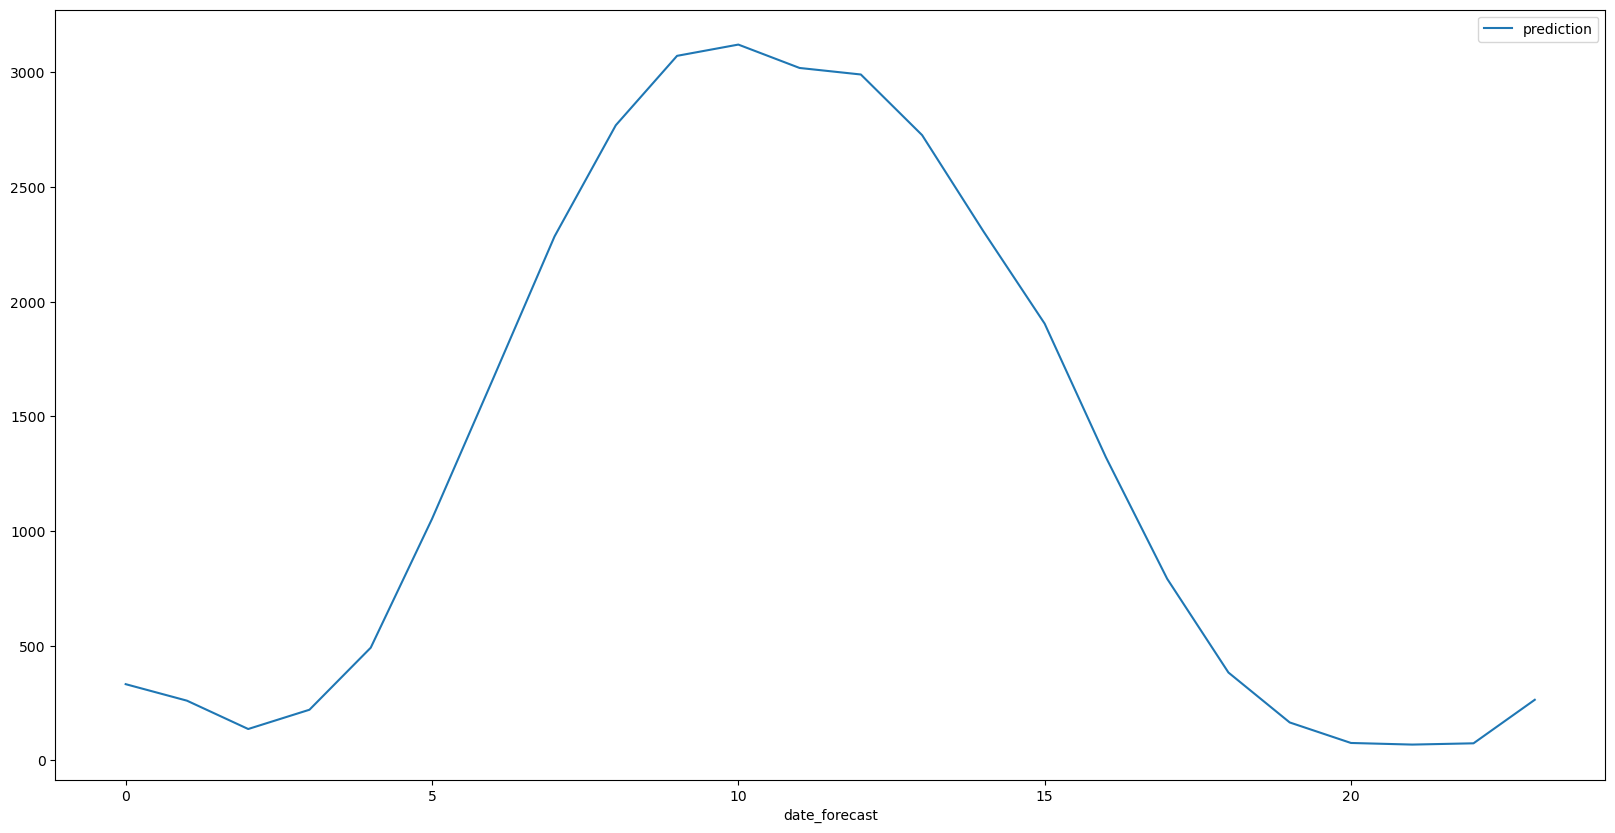

In [115]:
# show the pv_prediction average dsiutribution per hour
predictions.groupby(predictions.index.hour).mean().plot(figsize=(20,10))

In [116]:
# remove everything that is not a whole hour
predictions = predictions[predictions.index.minute == 0]

In [117]:
# reset index and remove date_forecast column
predictions = predictions.reset_index()
predictions = predictions.drop(columns=['date_forecast'])
# save predictions
predictions.to_csv(f'{save_path}/1026_xgboost_phourly_mean_A.csv')